## Import Dataset for SPG Classification

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# For multiple line outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

schoolData = pd.read_csv('C:/Users/taniat470s/Desktop/SMU_course/DS7331/PublicSchools2014to2017_4ML_0609.csv') # read in the csv file

In [4]:
schoolData_SPG = pd.read_csv('C:/Users/taniat470s/Desktop/SMU_course/DS7331/PublicSchools2014to2017_SPG.csv') # read in the csv file

### pick 50 features 

In [5]:
# Remove All the Columns that directly used to calculate SPG Grade and Score
schoolData.drop(schoolData.iloc[:, 273:275], inplace=True, axis=1)
schoolData.drop(schoolData.iloc[:, 13:152], inplace=True, axis=1)
schoolData.info(verbose=True)

#Pick and Choose variables
schoolData_pick = schoolData[[
'TotalTargets_pTarget_PctMet',
'MinorityMalePct',
'MinorityFemalePct',
'short_susp_per_c_num',
'avg_daily_attend_pct',
'title1_type_cd_Y',
'BlackMalePct',
'AsianFemalePct',
'BlackFemalePct',
'HispanicMalePct',
'MathGr3-8_pTarget_PctMet',
'AsianMalePct',
'SciGr5&8_pTarget_PctMet',
'nbpts_num',
'lea_sat_avg_score_num',
'stud_internet_comp_num',
'st_avg_student_num',
'HispanicFemalePct',
'Accomplished_TCHR_Standard 4_Pct',
'Accomplished_TCHR_Standard 3_Pct',
'Developing_TCHR_Standard 2_Pct',
'Accomplished_TCHR_Standard 5_Pct',
'10+ Years_LEA_Exp_Pct_Prin',
'4-10 Years_LEA_Exp_Pct_Prin',
'Accomplished_TCHR_Standard 1_Pct',
'Accomplished_TCHR_Standard 2_Pct',
'Developing_TCHR_Standard 1_Pct',
'pct_GCE_ALL',
'0-3 Years_LEA_Exp_Pct_Prin',
'st_emer_prov_teach_pct',
'lea_sat_participation_pct',
'lea_ap_participation_pct',
'lea_federal_perpupil_num',
'lea_local_perpupil_num',
'advance_dgr_pct',
'Developing_TCHR_Standard 5_Pct',
'lateral_teach_pct',
'lea_flicensed_teach_pct',
'Developing_TCHR_Standard 3_Pct',
'lea_tchyrs_0thru3_pct',
'lea_tchyrs_11plus_pct',
'lea_nbpts_num',
'lea_advance_dgr_pct',
'lea_1yr_tchr_trnovr_pct',
'lea_emer_prov_teach_pct',
'st_flicensed_teach_pct',
'st_tchyrs_0thru3_pct',
'st_1yr_tchr_trnovr_pct',
'lea_tchyrs_4thru10_pct',
'Category_Cd_T',
]]

# Dataset Dimension with picked variables
schoolData_pick.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Data columns (total 145 columns):
 #   Column                                                                           Dtype  
---  ------                                                                           -----  
 0   szip_ad                                                                          float64
 1   student_num                                                                      float64
 2   lea_avg_student_num                                                              float64
 3   st_avg_student_num                                                               float64
 4   Math I_Size                                                                      float64
 5   lea_total_expense_num                                                            float64
 6   lea_salary_expense_pct                                                           float64
 7   lea_services_expense_pct                 

(9731, 50)

### Simplify the response variable

,0
count,9216
unique,5
top,C
freq,3973


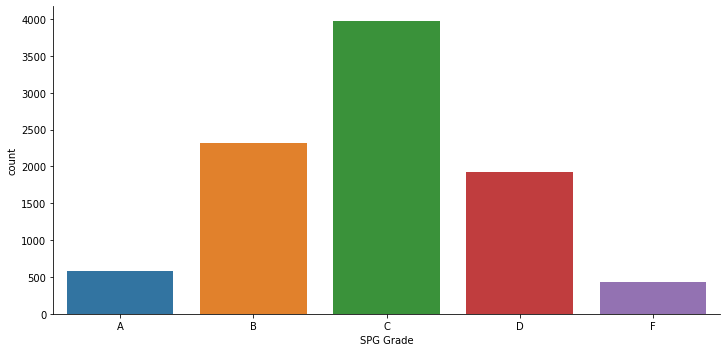

In [6]:
schoolData_SPG_org = schoolData_SPG
schoolData_SPG = schoolData_SPG_org

import numpy as np
schoolData_SPG= np.select(
    [
        schoolData_SPG == 'A', 
        schoolData_SPG == 'B',
        schoolData_SPG == 'C',
        schoolData_SPG == 'D',
        schoolData_SPG == 'F',
        schoolData_SPG == 'A+NG',
        schoolData_SPG == 'I'
    ], 
    [
        'A', 
        'B',
        'C',
        'D',
        'F',
        'A',
        'NA'
    ],
    default='NA'
)

#Filter out the sample with "NA" on SPG Grade
schoolData_SPG_new = schoolData_SPG[schoolData_SPG!='NA']
schoolData_pick_new = schoolData_pick[schoolData_SPG!='NA']

# Check if the levels of SPG Grade has been altered
s = pd.DataFrame(schoolData_SPG_new)
s.describe()

#Factor Plot for SPG Grade
s.columns=['SPG Grade']
                        
sns.factorplot("SPG Grade", data=s, aspect=2,
                       kind="count", order=['A','B','C','D','F'])

plt.show()

In [7]:
s = pd.Series(schoolData_SPG_new)
s

0       A
1       C
2       C
3       F
4       B
       ..
9211    B
9212    B
9213    B
9214    B
9215    B
Length: 9216, dtype: object

In [12]:
from imblearn.over_sampling import SMOTE

# Oversample using SMOTE
# Make all classes the same size as the majority class.
# WARNING - This can exponentially increase the size of the input dataset.
sm = SMOTE(sampling_strategy='not majority')
X_sm, y_sm = sm.fit_sample(schoolData_pick_new, pd.DataFrame(schoolData_SPG_new))

#plot_class_dist(y_sm)

In [17]:
#Location where the new school datasets will be created.
outputDir = 'C:/Users/taniat470s/Desktop/SMU_course/DS7331/'
X_sm.to_csv(outputDir + 'PublicSchools_2014to20174ML_SPGClassification_inputs.csv', sep=',', index=False)
y_sm.to_csv(outputDir + 'PublicSchools_2014to20174ML_SPGClassification_SPGGrade.csv', sep=',', index=False)

### Train/Test split using shufflesplit

In [29]:
from sklearn.model_selection import ShuffleSplit
num_cv_iterations = 3
num_instances = len(schoolData_SPG_new)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [39]:
for train_indices, test_indices in cv_object.split(schoolData_pick_new,schoolData_SPG_new): 

    Xsel_train = schoolData_pick_new.values[train_indices]
    ysel_train = schoolData_SPG_new.values[train_indices]
    
    Xsel_test = schoolData_pick_new.values[test_indices]
    ysel_test = schoolData_SPG_new.values[test_indices]
    
    clf.fit(Xsel_train,ysel_train)
    y_pred_shf=clf.predict(Xsel_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [41]:
total_accuracy_shf = mt.accuracy_score(ysel_test, y_pred_shf)
print ('KNN accuracy', total_accuracy_shf)

KNN accuracy 0.4631236442516269


### Train/Test split using StratifiedKFold

In [151]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt


# create variables we are more familiar with
X = schoolData_pick_new
y = s
yhat = np.zeros(y.shape) # we will fill this with predictions

scl = StandardScaler()
X = scl.fit_transform(X)

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)

# get a handle to the classifier object, which defines the type
clf = KNeighborsClassifier(n_neighbors=3)

Wall time: 112 ms


In [37]:
# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv.split(X,y):
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])

#total_accuracy = mt.accuracy_score(y, yhat)
#print ('KNN accuracy', total_accuracy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

#### KNN accuracy rise from 0.46 to 0.59

In [38]:
total_accuracy = mt.accuracy_score(y, yhat)
print ('KNN accuracy', total_accuracy)

KNN accuracy 0.5926649305555556


### KNN to take a PCA first

In [45]:
%%time
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline

# setup pipeline to take PCA, then fit a KNN classifier
clf_pipe = Pipeline(
    [('PCA_Eric',PCA(n_components=50,svd_solver='randomized')),
     ('CLF_Eric',KNeighborsClassifier(n_neighbors=1))]
)

Wall time: 998 µs


In [46]:
# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])

Pipeline(memory=None,
         steps=[('PCA_Eric',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF_Eric',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA_Eric',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF_Eric',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA_Eric',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF_Eric',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA_Eric',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF_Eric',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA_Eric',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF_Eric',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA_Eric',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF_Eric',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA_Eric',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF_Eric',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA_Eric',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF_Eric',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA_Eric',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF_Eric',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA_Eric',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF_Eric',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)

In [47]:

total_accuracy = mt.accuracy_score(y, yhat)
print ('KNN, pipeline accuracy', total_accuracy)

KNN, pipeline accuracy 0.5968967013888888


#### Accuracy rise from 0.592 to 0.597

#### Plot out accuracy for each class

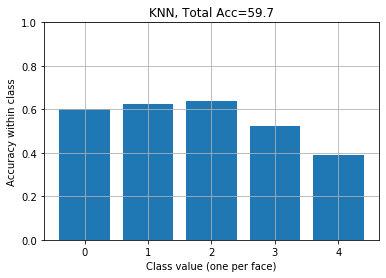

In [51]:
def per_class_accuracy(y,yhat):
    conf = mt.confusion_matrix(y,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value (one per face)')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
    
plot_class_acc(y,yhat,title="KNN")

### Use PCA + RandomForestClassifier

In [ ]:
#### Plot out accuracy for each class

%%time
from sklearn.ensemble import RandomForestClassifier

clf_pipe = Pipeline(
    [('PCA',PCA(n_components=50, svd_solver='randomized')),
     ('CLF',RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print ('Pipeline accuracy', total_accuracy)
plot_class_acc(y,yhat,title="Random Forest + PCA")

Accuracy 0.6786024305555556


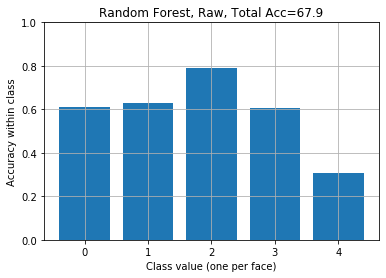

Wall time: 37.3 s


In [53]:
%%time
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1, oob_score=True)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print ('Accuracy', total_accuracy)
plot_class_acc(y,yhat,title="Random Forest, Raw")

#### Accuracy rise from 0.597 to 0.678

### Feature Importance Plot

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)


<BarContainer object of 50 artists>

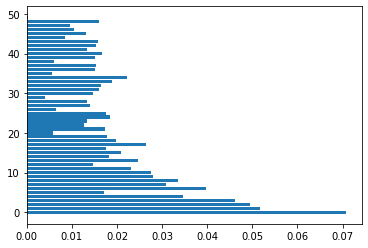

Generalization score estimate from training data 0.7170584689572032


In [54]:
# now lets get access to the different properties of our RF

print (clf)

plt.barh(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

print ('Generalization score estimate from training data', clf.oob_score_)

## Multi-classifier function1: 
- Stump
- Decisiion Tree
- Random Trees
- Extra Random Trees
- Boosted Tree

In [55]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score

num_estimators = 50
# lets train some trees
clf_array = [
    ('Stump',              DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)),
    ('Tree',               DecisionTreeClassifier()),
    ('Random Trees',       RandomForestClassifier(max_depth=50, n_estimators=num_estimators)),
    ('Extra Random Trees', ExtraTreesClassifier(n_estimators=num_estimators,min_samples_split=2)),
    ('Boosted Tree',       GradientBoostingClassifier(n_estimators=num_estimators)), #takes a long time
    ]
    
for clf in clf_array:
    acc = cross_val_score(clf[1],X,y)
    print (clf[0], acc.mean())

Stump 0.4411865615690724
Tree 0.5530586507192014
Random Trees 0.6817473750122114
Extra Random Trees 0.6797929787682301
Boosted Tree 0.6578728447793903
Wall time: 1min 45s


## PCA + Naive Bayes + CrossValidation (Stratified)

In [177]:
# create cross validation iterator
cv = StratifiedKFold(n_splits=10)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Pipeline accuracy 0.5065104166666666


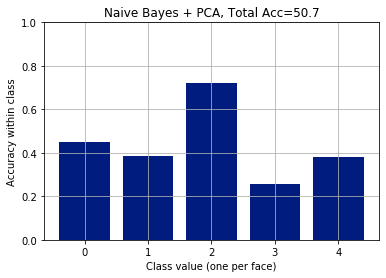

In [178]:
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB


# setup pipeline to take PCA, then fit a different classifier
clf_pipe = Pipeline(
    [('PCA',PCA(n_components=50,svd_solver='randomized')),
     ('CLF',GaussianNB())]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print ('Pipeline accuracy', total_accuracy)
plot_class_acc(y,yhat,title="Naive Bayes + PCA")

### A function to test the infreq class recall

In [180]:
from sklearn import metrics as mt

freq_infreq_threshold = 500

# get various measures of performance
total_accuracy = mt.accuracy_score(y, yhat)
per_class_acc_list = per_class_accuracy(y,yhat)

prec_for_freq_classes = []
recall_for_infreq_classes = []
rec_tot = []
prec_tot = []

for cls in np.unique(y):
    idx = (y==cls) # get classes
    ytmp_actual = np.zeros(y.shape) # make binary class problem
    ytmp_actual[idx] = 1 # set the instances for this specific class
    
    ytmp_predicted = np.zeros(y.shape) # binary prediction array
    ytmp_predicted[yhat==cls] = 1
    
    num_in_class = sum(idx)
    
    rec = mt.recall_score(ytmp_actual, ytmp_predicted)
    prec = mt.precision_score(ytmp_actual, ytmp_predicted)
    rec_tot.append(rec)
    prec_tot.append(prec)
    
    if num_in_class < freq_infreq_threshold:
        recall_for_infreq_classes.append(rec)
    elif num_in_class >= freq_infreq_threshold:
        prec_for_freq_classes.append(prec)
        
print ('Total Accuracy:',total_accuracy)
print ('Number of infrequent class:',len(recall_for_infreq_classes), 
       'with average recall of:', np.mean(recall_for_infreq_classes))
print ('Number of frequent class:',len(prec_for_freq_classes), 
       'with average precision of:',np.mean(prec_for_freq_classes))

Total Accuracy: 0.5065104166666666
Number of infrequent class: 1 with average recall of: 0.37906976744186044
Number of frequent class: 4 with average precision of: 0.5036651504819565


<Figure size 1080x360 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x13480f54648>,
 'caps': [<matplotlib.lines.Line2D at 0x13480f54f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x13480f4fe48>,
 'medians': [<matplotlib.lines.Line2D at 0x13480f59bc8>,
 'fliers': [<matplotlib.lines.Line2D at 0x13480f59fc8>,
 'means': []}

(0, 1)

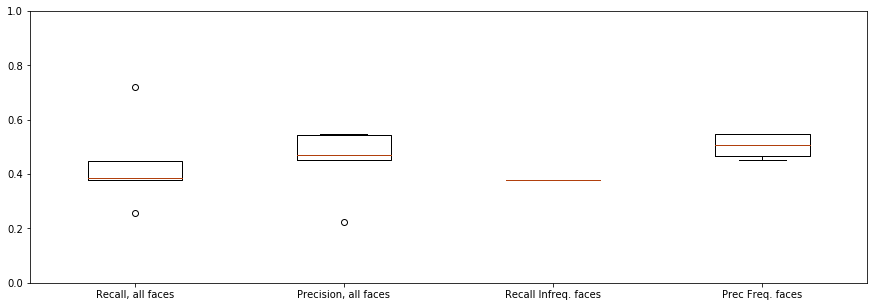

In [181]:
# But we can really summarize this data much better than this. 
# How about looking at more statistics of the precision and recall for each class?

import seaborn as sns
sns.set_palette("dark")
plt.figure(figsize=(15,5))
plt.boxplot([ rec_tot, prec_tot, recall_for_infreq_classes,prec_for_freq_classes],
            labels=['Recall, all faces','Precision, all faces','Recall Infreq. faces','Prec Freq. faces'])
plt.ylim([0,1])
plt.show()

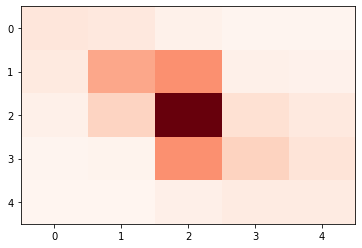

In [182]:
# how about plotting a confusion matrix?
cm = mt.confusion_matrix(y, yhat)
plt.imshow(cm,cmap=plt.get_cmap('Reds'),aspect='auto')
plt.grid(False)

### Still PCA + Naive_bayes Gassian, Calculate probability score

In [82]:
from sklearn.naive_bayes import GaussianNB


# setup pipeline to take PCA, then fit a different classifier
clf_pipe = Pipeline(
    [('PCA',PCA(n_components=50,svd_solver='randomized')),
     ('CLF',GaussianNB())]
)


yhat_score = np.zeros((y.shape[0],5))

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])
    yhat_score[test] = clf_pipe.predict_proba(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print ('Pipeline accuracy', total_accuracy)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=False)),
                ('CLF', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Pipeline accuracy 0.5065104166666666


### Convert y from String to Numeric

In [109]:
schoolData_SPG_new = schoolData_SPG_new_org
#schoolData_SPG_new_org = schoolData_SPG_new
schoolData_SPG_new= np.select(
    [
        schoolData_SPG_new == 'A', 
        schoolData_SPG_new == 'B',
        schoolData_SPG_new == 'C',
        schoolData_SPG_new == 'D',
        schoolData_SPG_new == 'F',
    ], 
    [
        '0', 
        '1',
        '2',
        '3',
        '4',
    ],
    default='NA'
)

In [110]:
schoolData_SPG_new = schoolData_SPG_new.astype(int)
y=schoolData_SPG_new

In [114]:
np.unique(y)

array([0, 1, 2, 3, 4])

In [143]:
y.shape
yhat_score.shape

(9216,)

(9216, 5)

### Calculate ROC curves for all classes

In [123]:
import seaborn as sns
sns.set_palette("dark")
# code manipulated from http://scikit-learn.org/stable/auto_examples/plot_roc.html
from sklearn.preprocessing import label_binarize

# Compute ROC curve for a subset of interesting classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in np.unique(y):
    fpr[i], tpr[i], _ = mt.roc_curve(y, yhat_score[:, i], pos_label=i)
    roc_auc[i] = mt.auc(fpr[i], tpr[i])

In [150]:
y.shape

(9216,)

In [149]:
yhat_score[:, i].shape

(9216,)

In [128]:
roc_auc

{0: 0.8589443653361377,
 1: 0.7366682180263485,
 2: 0.6712054892362087,
 3: 0.7487627336317503,
 4: 0.8703839088613492}

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

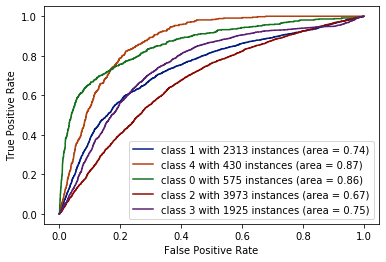

In [129]:
for i in np.random.permutation(5)[0:5]:
    plt.plot(fpr[i], tpr[i], label='class {0} with {1} instances (area = {2:0.2f})'
                                   ''.format(i, sum(y==i), roc_auc[i]))

plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Calculate ROC curve overall
Have some issues

In [134]:
one_hot_class_encoding = label_binarize(y,np.unique(y))

In [144]:
one_hot_class_encoding

array([[1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [145]:
yhat_score.ravel()

array([9.77676755e-01, 1.40731309e-07, 5.13326020e-07, ...,
       3.68493847e-01, 1.33064474e-02, 1.29004901e-03])

In [167]:
# combined ROC over all classes
one_hot_class_encoding = label_binarize(y,np.unique(y))
fpr["micro"], tpr["micro"], _ = mt.roc_curve(one_hot_class_encoding, yhat_score.ravel())
roc_auc["micro"] = mt.auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(12,4))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))

ValueError: multilabel-indicator format is not supported

## Crossvalidation Function: StratifiedKFold, more measurements

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import time

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)

def stratified_cross_validate(model, X, y, cv=cv):
    start = time.time()
    cv_results = cross_validate(model, X, y, cv=cv, scoring="accuracy", n_jobs=-1)
    elapsed_time = (time.time() - start) 
    print ('Fold Scores:')
    print(' ')
    print(cv_results['test_score'])
    print(' ')
    print('Mean Accuracy: ', cv_results['test_score'].mean())
    print('Mean Fit Time: ', cv_results['fit_time'].mean())
    print('Mean Score Time: ', cv_results['score_time'].mean())
    print('CV Time: ', elapsed_time)
    return

## Function test multiple classifier
- GaussianNB
- MultinomialNB
- SGDClassifier
- RandomForestClassifier
- LinearSVC
- LogisticRegression

In [187]:
# Sklearn Classifiers 
from sklearn.naive_bayes import MultinomialNB, GaussianNB 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier


models = [
    #XGBClassifier(),
    GaussianNB(), 
    MultinomialNB(),
    SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3,max_iter=5, 
                  tol=None, n_jobs=-1, random_state=42),
    #RandomForestClassifier(n_estimators=200, max_depth=3, 
    #                       n_jobs=-1, random_state=42),
    RandomForestClassifier(n_estimators=200, max_depth=50, 
                           n_jobs=-1, random_state=42),
    #LinearSVC(random_state=42),
    #LogisticRegression(n_jobs=-1, random_state=42)
]

model_names = ['GaussianNB','MultinomialNB','SGDClassifier',
               'RandomForestClassifier','LinearSVC','LogisticRegression']


    
def test_models(X, y):
    for model, model_name in zip(models,model_names):
        print(model_name)
        print('--------------------------------')
        stratified_cross_validate(model,X,y)
        acc = cross_val_score(model,X,y)
        print(acc.mean())
        print(' ')

In [188]:
test_models(X,y)

GaussianNB
--------------------------------
Fold Scores:
 
[0.51301518 0.52494577 0.52277657 0.53036876 0.52386117 0.54663774
 0.51791531 0.52877307 0.55808903 0.52660152]
 
Mean Accuracy:  0.529298414201295
Mean Fit Time:  0.044236183166503906
Mean Score Time:  0.0045849323272705075
CV Time:  0.2608151435852051
0.5252817426081922
 
MultinomialNB
--------------------------------
Fold Scores:
 
[nan nan nan nan nan nan nan nan nan nan]
 
Mean Accuracy:  nan
Mean Fit Time:  0.01815798282623291
Mean Score Time:  0.0
CV Time:  0.10870838165283203
nan
 
SGDClassifier
--------------------------------
Fold Scores:
 
[0.56724512 0.57158351 0.55639913 0.5791757  0.57809111 0.50433839
 0.53745928 0.53528773 0.54288817 0.56460369]
 
Mean Accuracy:  0.5537071842593051
Mean Fit Time:  0.1445650577545166
Mean Score Time:  0.0011889219284057617
CV Time:  0.5589373111724854
0.5661859436479474
 
RandomForestClassifier
--------------------------------
Fold Scores:
 
[0.72234273 0.73752711 0.73644252 0.7

### RF hyperparameter changes the accuracy score a lot
- MaxDepth
- nEstimator 

## Scaling and PCA
### All the Xs below are scaled

In [155]:
from sklearn.preprocessing import StandardScaler
# Scale the data 
ss = StandardScaler()
X = ss.fit_transform(X)

Cumulative Explained variance at 200 components: 0.9999999999999997


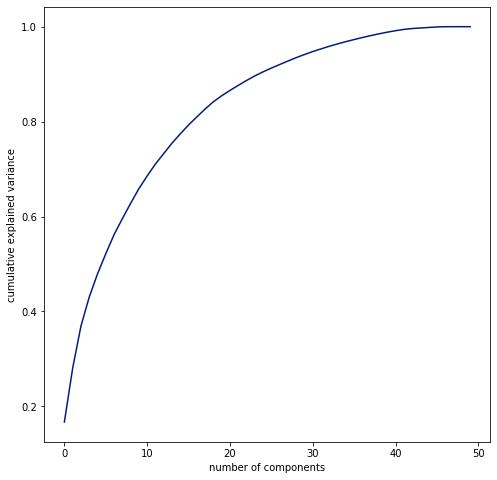

In [156]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_pca(X):
    # Perform PCA on the data to reduce the number of initial features 
    # and to remove correlations that are common between pixel features 
    pca = PCA(n_components=X.shape[1])
    pca.fit(X)

    # Inspect the explained variances to determine how many components to use  
    plt.subplots(figsize=(8, 8))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    print('Cumulative Explained variance at 200 components:',sum(pca.explained_variance_ratio_[0:199]) )
    
plot_pca(X)

In [162]:
y=schoolData_SPG_new

### Function to plot the current class distribution and counts

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Adapted from:
# https://www.featureranking.com/tutorials/machine-learning-tutorials/information-gain-computation/
def gini_index(y):
    probs = pd.value_counts(y,normalize=True)
    return 1 - np.sum(np.square(probs))

def plot_class_dist(y):
    fig, axarr = plt.subplots(1, 2, figsize=(18, 6))
    class_ct = len(np.unique(y))
    vc = pd.value_counts(y)
    print('Total Records', len(y))
    print('Total Classes:', class_ct)
    print('Class Gini Index', gini_index(y))
    print('Smallest Class Id:',vc.idxmin(),'Records:',vc.min())
    print('Largest Class Id:',vc.idxmax(),'Records:',vc.max())
    print('Accuracy when Guessing:', np.round( (1 / len(np.unique(y))) * 100, 2), '%')

    sns.distplot(y, ax=axarr[0], bins=class_ct).set_title('LFW Class Distribution');
    sns.distplot(y, ax=axarr[1], kde=False, bins=class_ct).set_title('LFW Class Counts');
    

#plot_class_dist(y)

## Single Stratify Train/Test Split

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x134801a91c8>)

Text(0.5, 0, 'Predicted')

Text(0, 0.5, 'Expected')

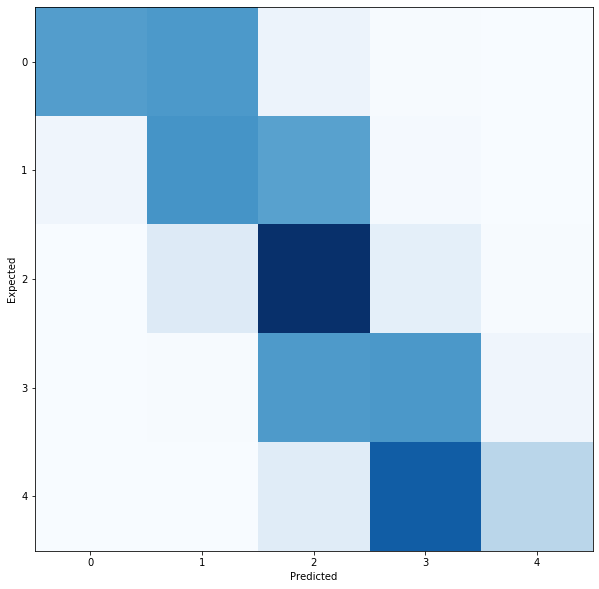

In [169]:
from sklearn.model_selection import train_test_split
#from StrandSliceClassifier import StrandSliceClassifier
from sklearn.linear_model import LogisticRegression

# Break our data into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Use StrandSliceClassifier to build a model and predict on the test set
strand = LogisticRegression(solver='liblinear', random_state=42)
strand.fit(X_train, y_train)
y_pred = strand.predict(X_test)

# Create a confusion matrix to see what classes StrandSliceClassifier is getting wrong 
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm_normalized,cmap=plt.get_cmap('Blues'),aspect='auto')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.grid(False)

In [191]:
cross_val_score(strand,X,y).mean()

0.6003662212534265

In [170]:
lr = LogisticRegression(n_jobs=-1, random_state=42, class_weight="balanced")
stratified_cross_validate(lr, X, y, cv)

Fold Scores:
 
[0.5835141  0.57049892 0.61822126 0.5845987  0.59761388 0.59869848
 0.57763301 0.58740499 0.6102063  0.61563518]
 
Mean Accuracy:  0.5944024815052958
Mean Fit Time:  1.0978695154190063
Mean Score Time:  0.001194930076599121
CV Time:  5.435153245925903


## Test Smote (with scaled Xs)

Total Records 19865
Total Classes: 5
Class Gini Index 0.7999999999999999
Smallest Class Id: 4 Records: 3973
Largest Class Id: 4 Records: 3973
Accuracy when Guessing: 20.0 %


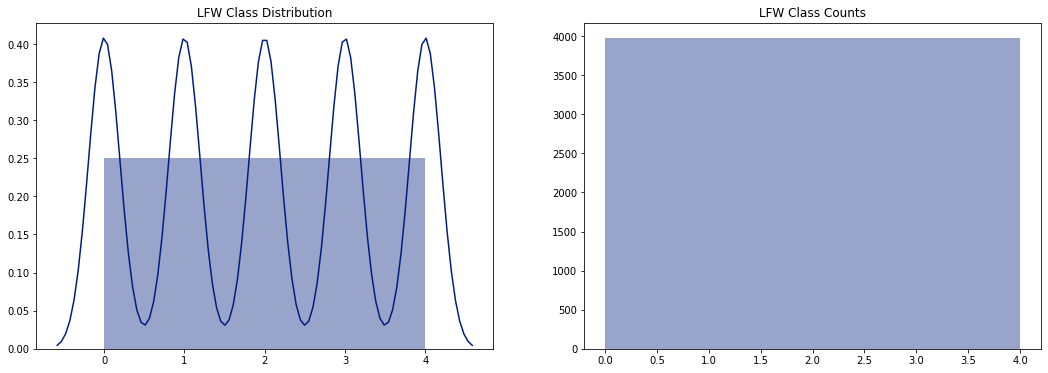

In [171]:
from imblearn.over_sampling import SMOTE

# Oversample using SMOTE
# Make all classes the same size as the majority class.
# WARNING - This can exponentially increase the size of the input dataset.
sm = SMOTE(sampling_strategy='not majority')
X_sm, y_sm = sm.fit_sample(X, y)

# Plot the new class distributions for y using the same funnction as above. 
plot_class_dist(y_sm)

In [172]:
lr = LogisticRegression(n_jobs=-1, random_state=42)

print('Original Dataset Scaled')
print('----------------------------------------------------------------')
stratified_cross_validate(lr, X, y)
print('\nOversample all Classes to Majority Dataset')
print('----------------------------------------------------------------')
stratified_cross_validate(lr, X_sm, y_sm)

Original Dataset Scaled
----------------------------------------------------------------
Fold Scores:
 
[0.64099783 0.64967462 0.68763557 0.65618221 0.64533623 0.62255965
 0.62106406 0.65689468 0.65038002 0.65038002]
 
Mean Accuracy:  0.648110490106717
Mean Fit Time:  0.9673942565917969
Mean Score Time:  0.001096057891845703
CV Time:  2.9937729835510254

Oversample all Classes to Majority Dataset
----------------------------------------------------------------
Fold Scores:
 
[0.70256668 0.72571716 0.71967791 0.70306995 0.70659285 0.70241692
 0.69284995 0.6998993  0.6898288  0.68831823]
 
Mean Accuracy:  0.703093775198407
Mean Fit Time:  2.358337378501892
Mean Score Time:  0.0014955997467041016
CV Time:  6.842618703842163


## PCA of SMOTE

Cumulative Explained variance at 200 components: 1.0000000000000002


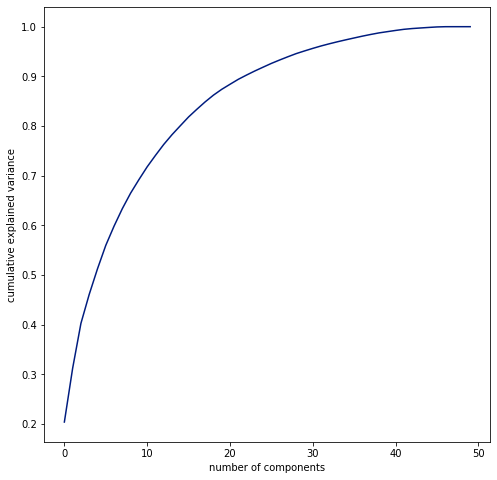

In [173]:
plot_pca(X_sm)

In [ ]:
# Convert X_sm to 200 principal components
pca = PCA(n_components=40)
X_sm_pca40 = pca.fit_transform(X_sm)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
print('Oversample all Classes to Majority Dataset @ 40 Principal Components')
print('----------------------------------------------------------------')
stratified_cross_validate(LogisticRegression(), X_sm_pca40, y_sm, cv)

## Test all regressors with SMOTE data first 40 PCA components

In [193]:
# Compare the Oversampled, PCA dataset our baseline accuracy
test_models(X_sm_pca40,y_sm)

GaussianNB
--------------------------------
Fold Scores:
 
[0.57423251 0.57674887 0.55762456 0.55963764 0.5691998  0.57301108
 0.54380665 0.56747231 0.56243706 0.51208459]
 
Mean Accuracy:  0.5596255063755295
Mean Fit Time:  0.0768932819366455
Mean Score Time:  0.01376359462738037
CV Time:  2.34732985496521
0.5126604580921219
 
MultinomialNB
--------------------------------
Fold Scores:
 
[nan nan nan nan nan nan nan nan nan nan]
 
Mean Accuracy:  nan
Mean Fit Time:  0.036501383781433104
Mean Score Time:  0.0
CV Time:  0.18851542472839355
nan
 
SGDClassifier
--------------------------------
Fold Scores:
 
[0.60442879 0.62304982 0.61248113 0.5953699  0.60342224 0.64249748
 0.6102719  0.61782477 0.60624371 0.61782477]
 
Mean Accuracy:  0.6133414525736522
Mean Fit Time:  0.23485653400421141
Mean Score Time:  0.0025923728942871095
CV Time:  0.8277504444122314
0.5764913163856028
 
RandomForestClassifier
--------------------------------
Fold Scores:
 
[0.86763966 0.88575742 0.86914947 0.8721